In [1]:
from hotelling.relaxed.tests import generate_test_graphs, test_on_graphs
test_graphs = generate_test_graphs(size_limit=15)

## Сбалансированное дерево

In [2]:
import graph_tool.all as gt
import numpy as np
from hotelling.relaxed import run_mirror_descent
from hotelling.relaxed.utils import plot_entropy_dynamics, visualize_strategies, visualize_strategy_evolution, visualize_final_deterministic
# данные
G = test_graphs["BalancedTree"]
dist_u_v = gt.shortest_distance(G).get_2d_array(range(G.num_vertices()))
d_u = np.ones(G.num_vertices()) / G.num_vertices()

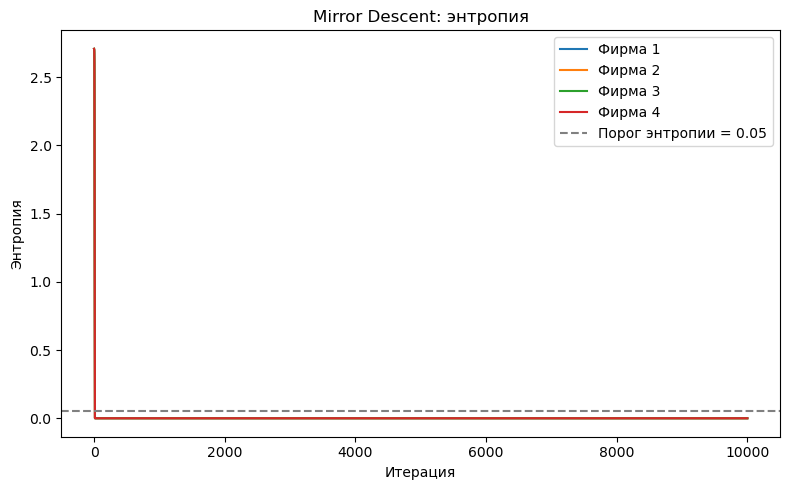

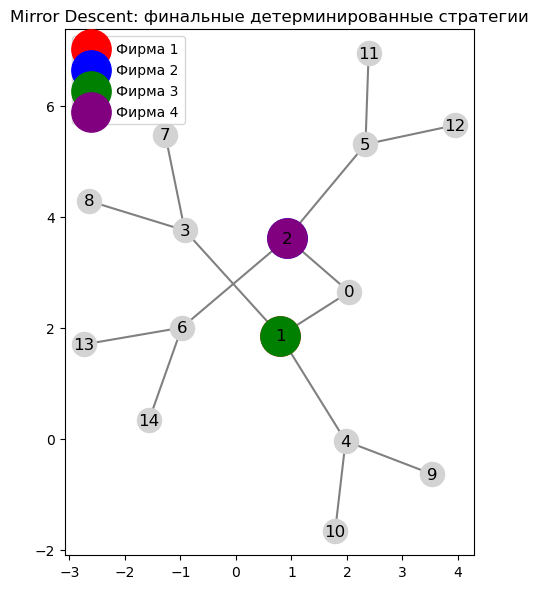

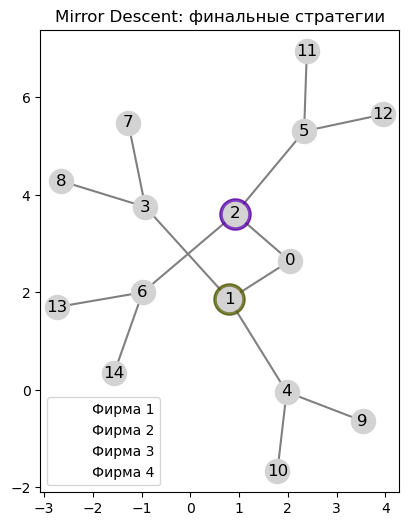

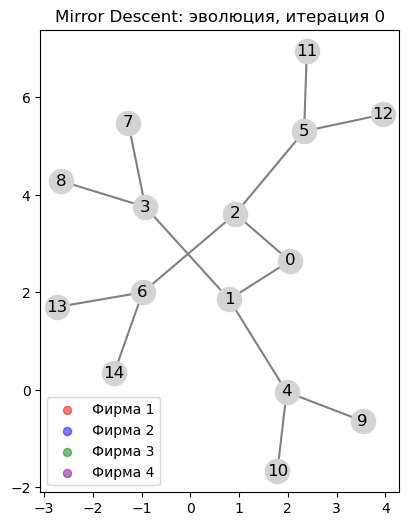

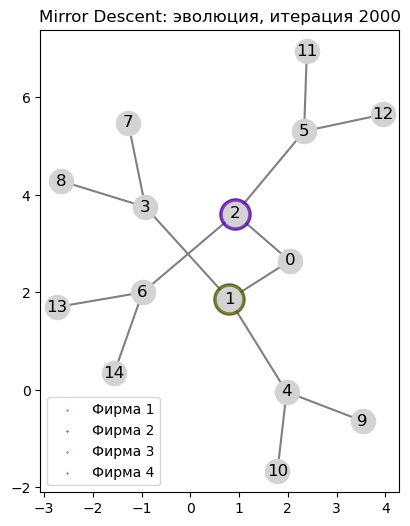

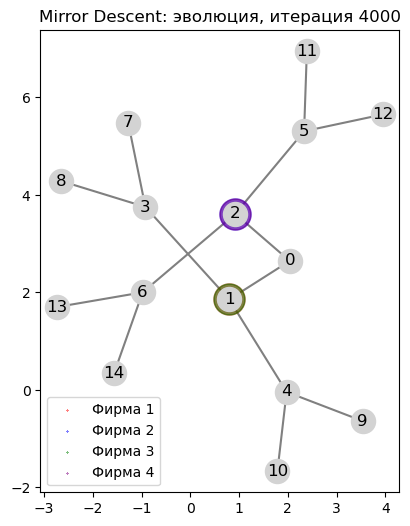

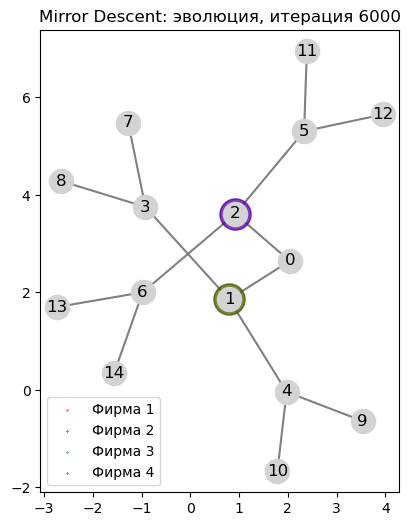

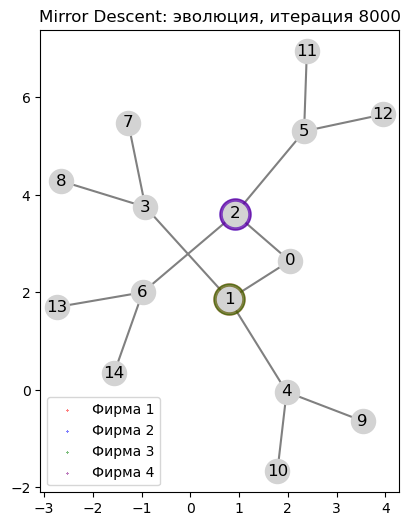

=== Mirror Descent ===
Nash: True
 - Фирма 1: стратегия устойчива — равновесие Нэша.
 - Фирма 2: стратегия устойчива — равновесие Нэша.
 - Фирма 3: стратегия устойчива — равновесие Нэша.
 - Фирма 4: стратегия устойчива — равновесие Нэша.


In [3]:
# запуск
T = 10000
md_res = run_mirror_descent(G, dist_u_v, d_u, m=4, T=T,eta = 0.5, beta=1)
plot_entropy_dynamics(md_res["entropy"], title="Mirror Descent: энтропия")
visualize_final_deterministic(G, md_res["x"], title="Mirror Descent: финальные детерминированные стратегии")
visualize_strategies(G, md_res["x"], title="Mirror Descent: финальные стратегии")
visualize_strategy_evolution(G, md_res["log"], every=T//5, title="Mirror Descent: эволюция")
print("=== Mirror Descent ===")
print("Nash:", md_res["nash"])
for msg in md_res["nash_messages"]:    
    print(" -", msg)

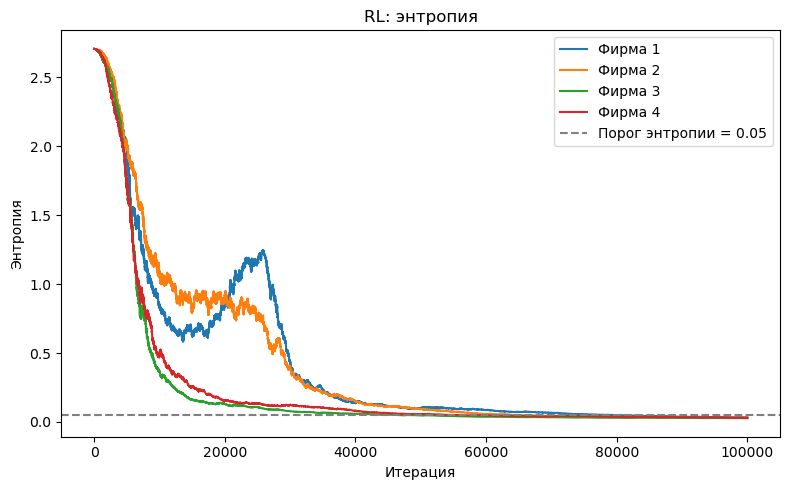

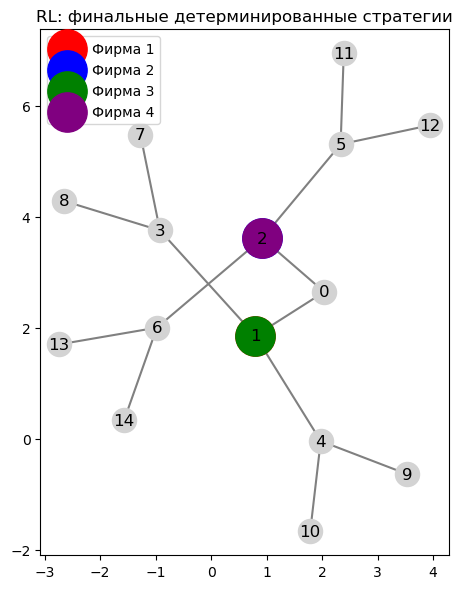

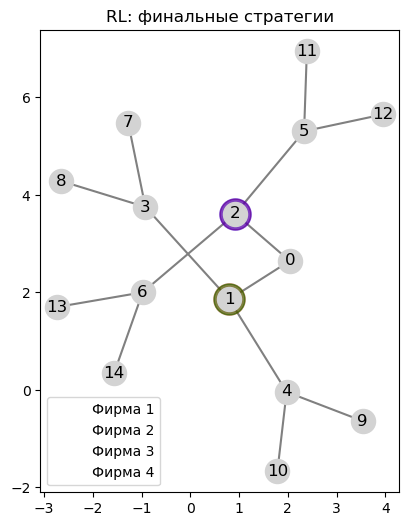

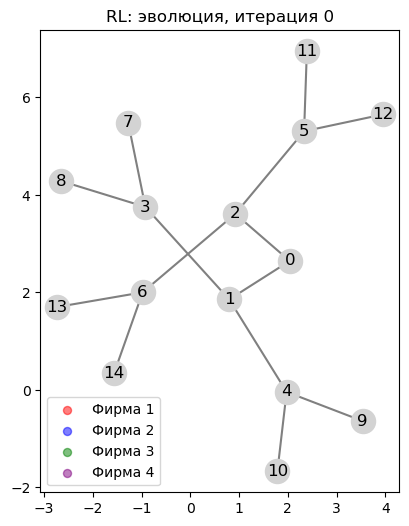

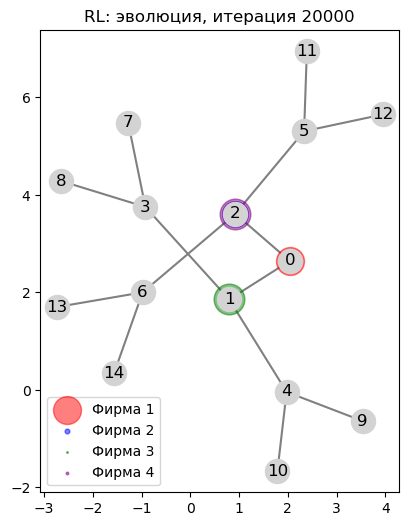

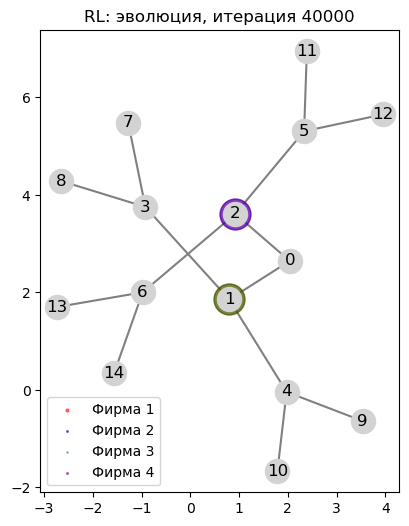

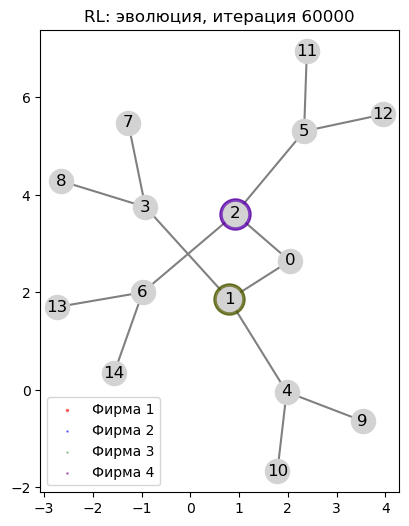

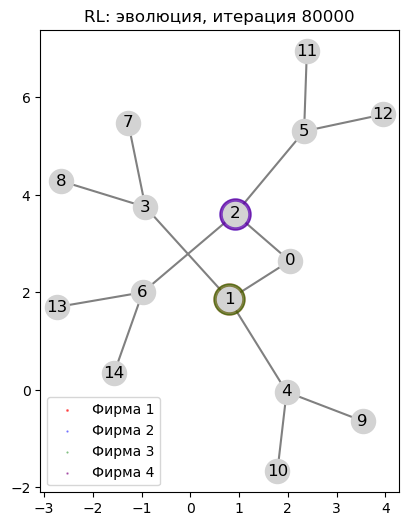

=== RL ===
Positions: [True, True, True, True]
Nash: True
 - Фирма 1: стратегия устойчива — равновесие Нэша.
 - Фирма 2: стратегия устойчива — равновесие Нэша.
 - Фирма 3: стратегия устойчива — равновесие Нэша.
 - Фирма 4: стратегия устойчива — равновесие Нэша.


In [4]:
from hotelling.relaxed import run_rl
T = 100000
rl_res = run_rl(G, dist_u_v, d_u, m=4, T=T, eta=0.05, entropy_weight=0, seed = 20)
plot_entropy_dynamics(rl_res["entropy"], "RL: энтропия")
visualize_final_deterministic(G, rl_res["x"], title="RL: финальные детерминированные стратегии")
visualize_strategies(G, rl_res["x"], "RL: финальные стратегии")
visualize_strategy_evolution(G, rl_res["log"], every=T//5, title="RL: эволюция")
print("=== RL ===")
print("Positions:", rl_res["determinized"])
print("Nash:", rl_res["nash"])
for msg in rl_res["nash_messages"]:    
    print(" -", msg)

# Сетка 3x4

In [5]:
import graph_tool.all as gt
import numpy as np
from hotelling.relaxed import run_mirror_descent
from hotelling.relaxed.utils import plot_entropy_dynamics, visualize_strategies, visualize_strategy_evolution, visualize_final_deterministic
# данные
G = gt.lattice((3,4))
dist_u_v = gt.shortest_distance(G).get_2d_array(range(G.num_vertices()))
d_u = np.ones(G.num_vertices()) / G.num_vertices()

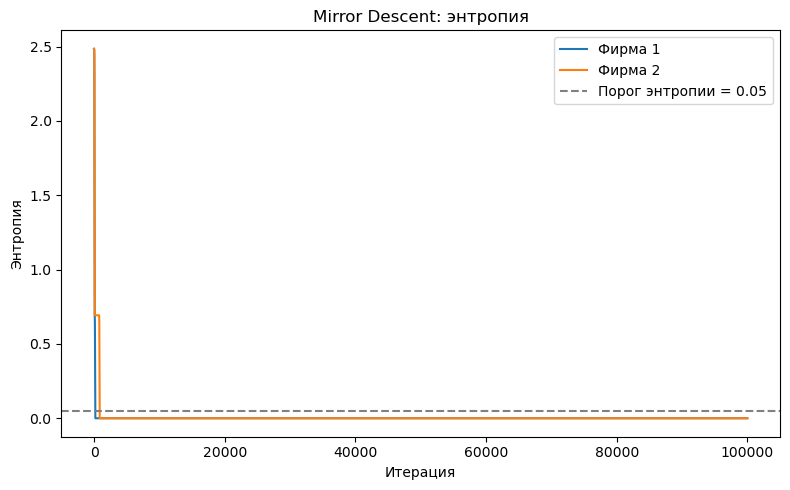

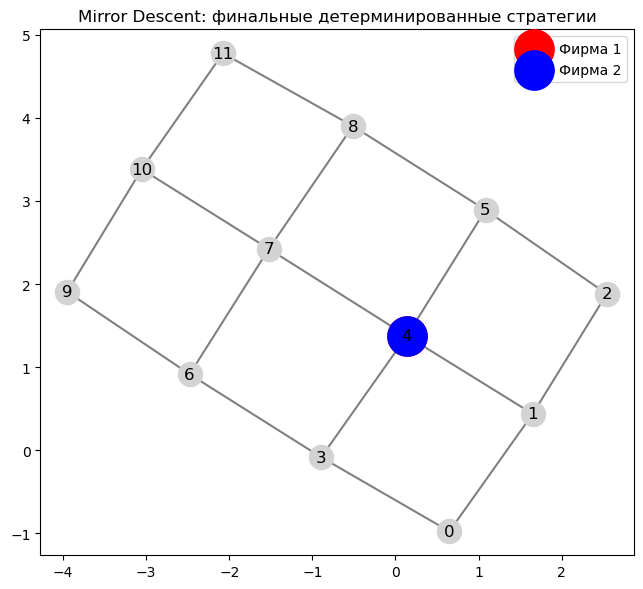

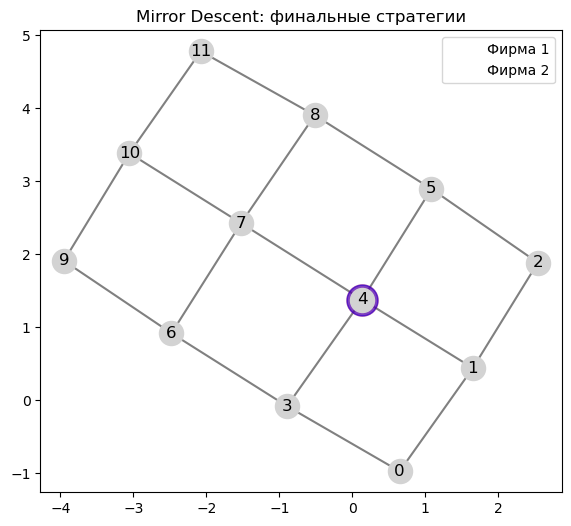

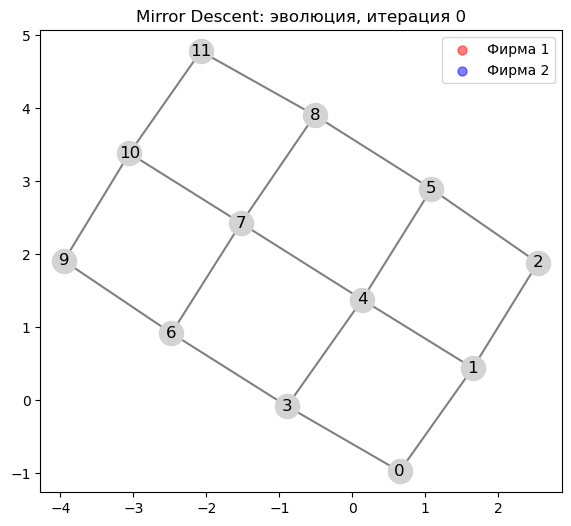

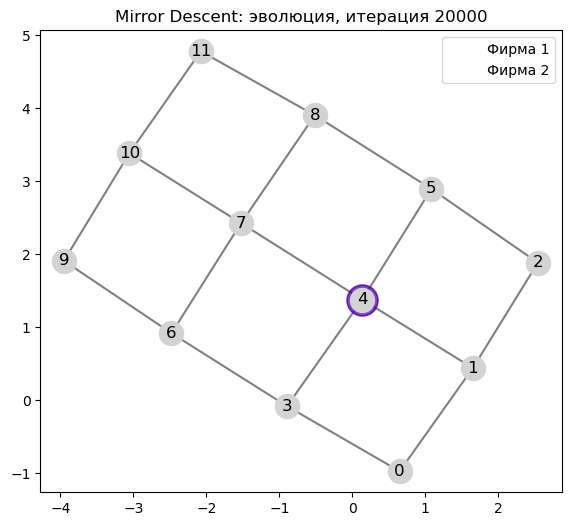

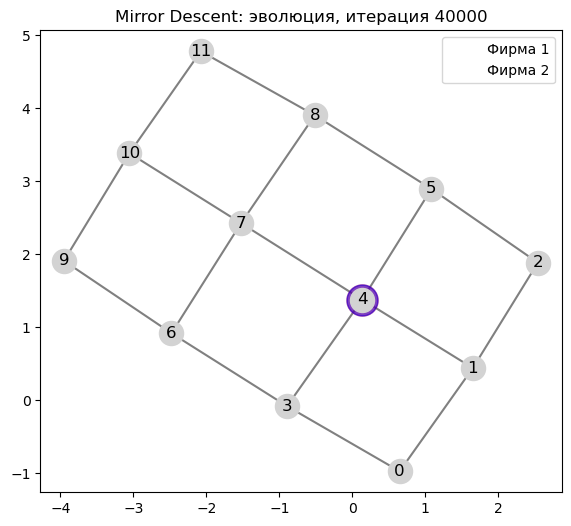

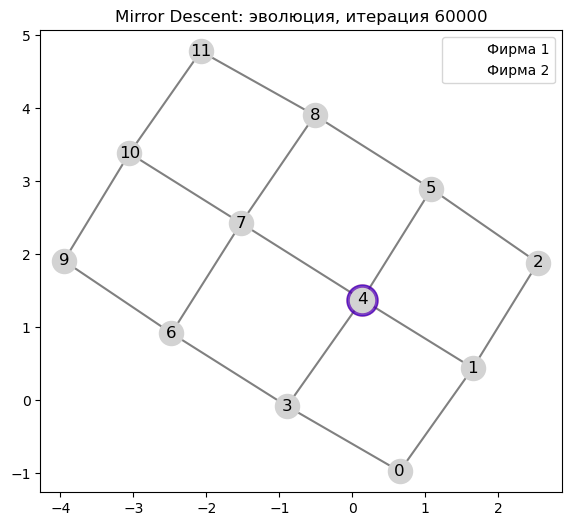

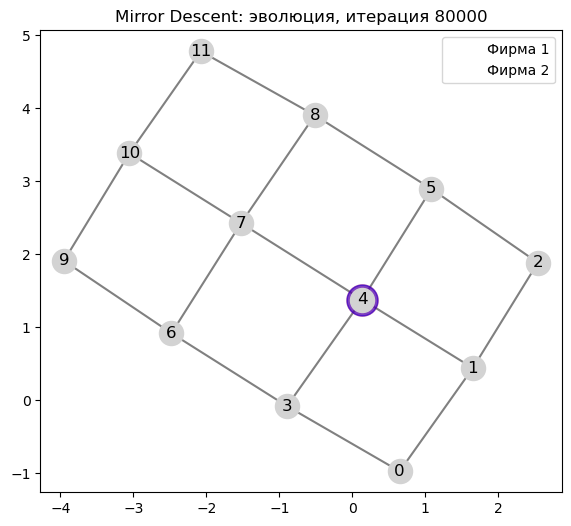

=== Mirror Descent ===
Nash: True
 - Фирма 1: стратегия устойчива — равновесие Нэша.
 - Фирма 2: стратегия устойчива — равновесие Нэша.


In [8]:
# запуск
T = 100000
md_res = run_mirror_descent(G, dist_u_v, d_u, m=2, T=T,eta = 0.05, beta=1)
plot_entropy_dynamics(md_res["entropy"], title="Mirror Descent: энтропия")
visualize_final_deterministic(G, md_res["x"], title="Mirror Descent: финальные детерминированные стратегии")
visualize_strategies(G, md_res["x"], title="Mirror Descent: финальные стратегии")
visualize_strategy_evolution(G, md_res["log"], every=T//5, title="Mirror Descent: эволюция")
print("=== Mirror Descent ===")
print("Nash:", md_res["nash"])
for msg in md_res["nash_messages"]:
    print(" -", msg)

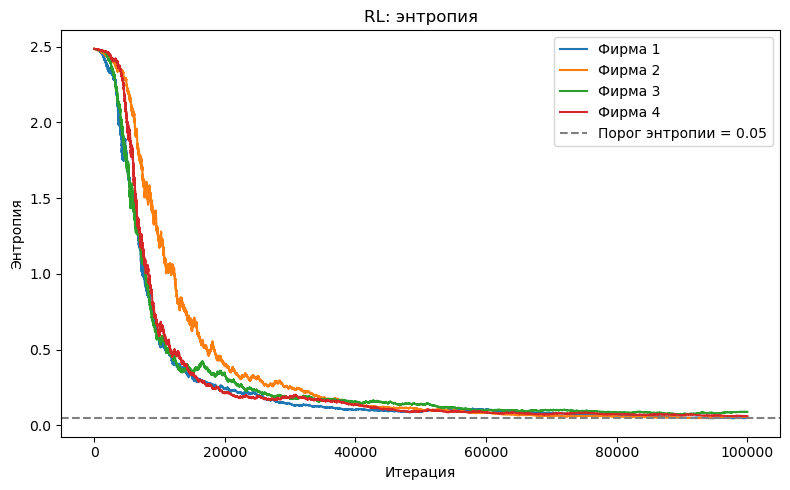

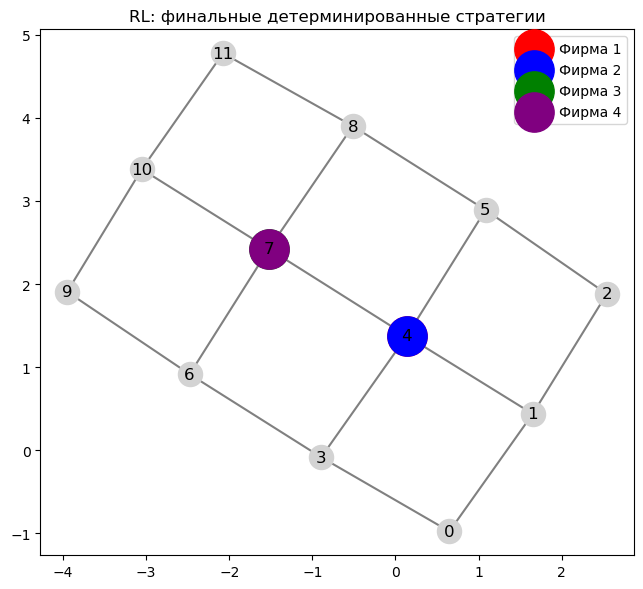

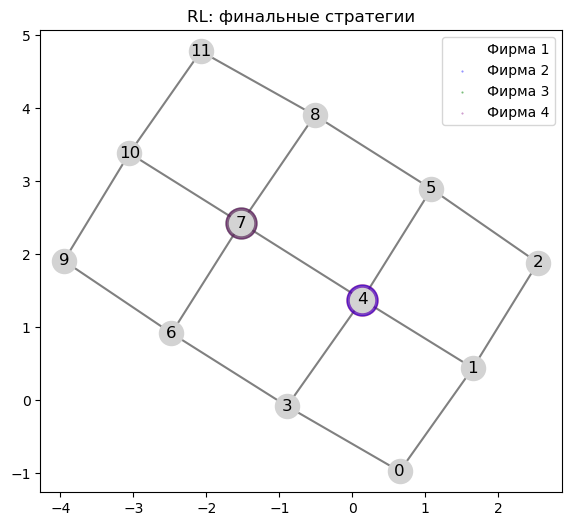

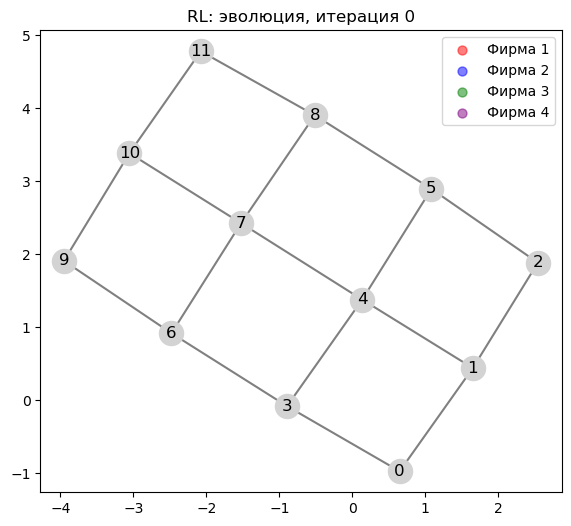

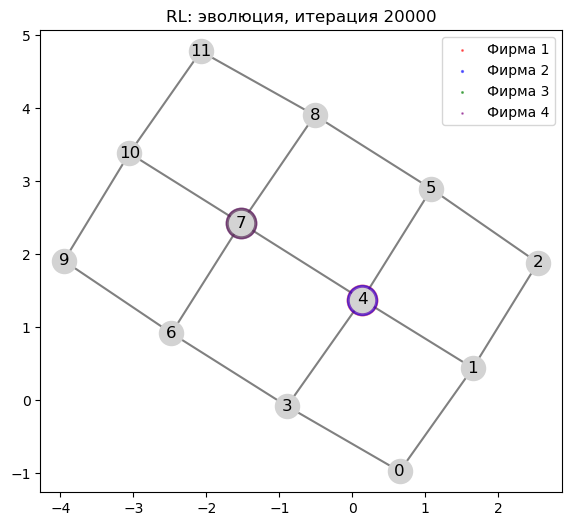

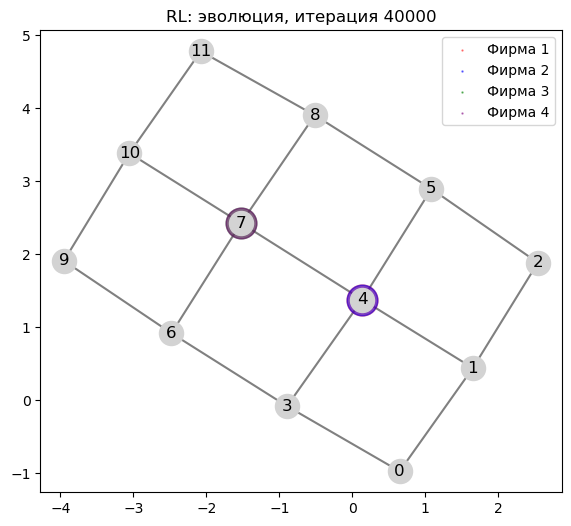

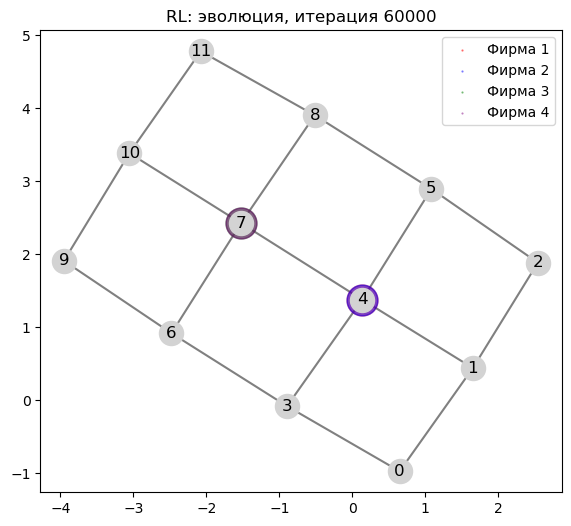

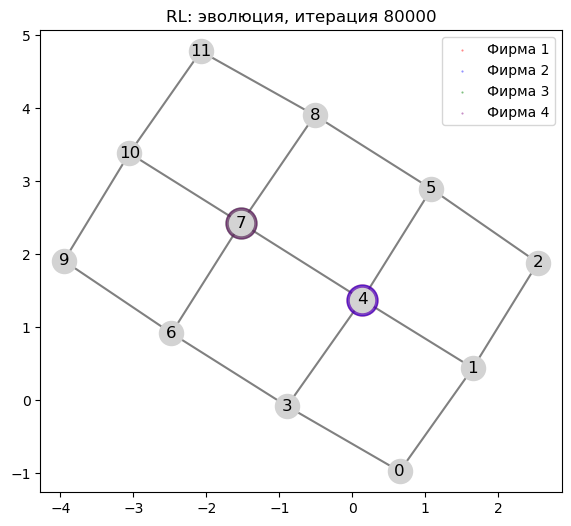

=== RL ===
Positions: [True, False, False, False]
Nash: True
 - Фирма 1: стратегия устойчива — равновесие Нэша.
 - Фирма 2: стратегия устойчива — равновесие Нэша.
 - Фирма 3: стратегия устойчива — равновесие Нэша.
 - Фирма 4: стратегия устойчива — равновесие Нэша.


In [9]:
from hotelling.relaxed import run_rl
T = 100000
rl_res = run_rl(G, dist_u_v, d_u, m=4, T=T, eta=0.05, entropy_weight=0, seed = 20)
plot_entropy_dynamics(rl_res["entropy"], "RL: энтропия")
visualize_final_deterministic(G, rl_res["x"], title="RL: финальные детерминированные стратегии")
visualize_strategies(G, rl_res["x"], "RL: финальные стратегии")
visualize_strategy_evolution(G, rl_res["log"], every=T//5, title="RL: эволюция")
print("=== RL ===")
print("Positions:", rl_res["determinized"])
print("Nash:", rl_res["nash"])
for msg in rl_res["nash_messages"]:    
    print(" -", msg)